In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [99]:
df = pd.read_csv('medical_examination.csv')

In [100]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.

In [101]:
# Convert height from cm to m
df['height_m'] = df['height'] / 100

# Calculate BMI
df['bmi'] = df['weight'] / (df['height_m'] ** 2)

df
# First get 

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,bmi
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1.68,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.56,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,1.65,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.69,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1.56,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.68,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.58,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.83,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.63,27.099251


In [102]:
# Add 'overweight' column
df['overweight'] = df['bmi'].apply(lambda x: 1 if x >= 25 else 0) 

In [103]:
# Normalize data by making 0 always good and 1 always bad.
# If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
# If the value is more than 1, make the value 1.
df['cholesterol'] = df['cholesterol'].apply(lambda x: 1 if x > 1 else 0)
df['gluc'] = df['gluc'].apply(lambda x: 1 if x > 1 else 0)
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1.68,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.56,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1.65,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.69,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1.56,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.68,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.58,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.83,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.63,27.099251,1


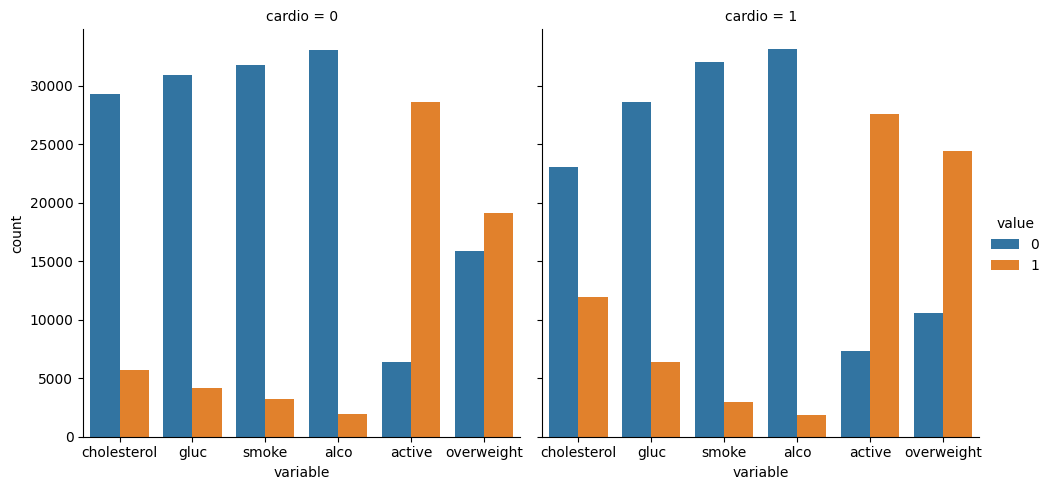

In [104]:
# Convert the data into long format and create a chart that shows the 
# value counts of the categorical features using seaborn's catplot(). 
df_melt = pd.melt(df, value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'], 
                                  id_vars=['cardio'])

# The dataset should be split by 'Cardio' so there is one chart for each
# cardio value. The chart should look like examples/Figure_1.png.
sns.catplot(data=df_melt, kind='count', x='variable', hue='value', col='cardio')

In [105]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1.68,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.56,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1.65,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.69,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1.56,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.68,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.58,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.83,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.63,27.099251,1


In [106]:

df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1.68,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.56,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1.65,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.69,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1.56,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.68,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.58,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.83,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.63,27.099251,1


In [107]:
df = df[df['ap_lo'] <= df['ap_hi']]
# height is less than the 2.5th percentile 
h_low = df['height'].quantile(0.025)
# (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
# height is more than the 97.5th percentile
h_high = df['height'].quantile(0.975)
df = df[(df['height'] >= h_low) & (df['height'] <= h_high)]
# weight is less than the 2.5th percentile
w_low = df['weight'].quantile(0.025)
# weight is more than the 97.5th percentile
w_high = df['weight'].quantile(0.975)
df = df[(df['weight'] >= w_low) & (df['weight'] <= w_high)]



In [108]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,height_m,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,1.68,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.56,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,1.65,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.69,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,1.56,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,1.72,23.661439,0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1.65,29.384757,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.68,26.927438,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.63,27.099251,1


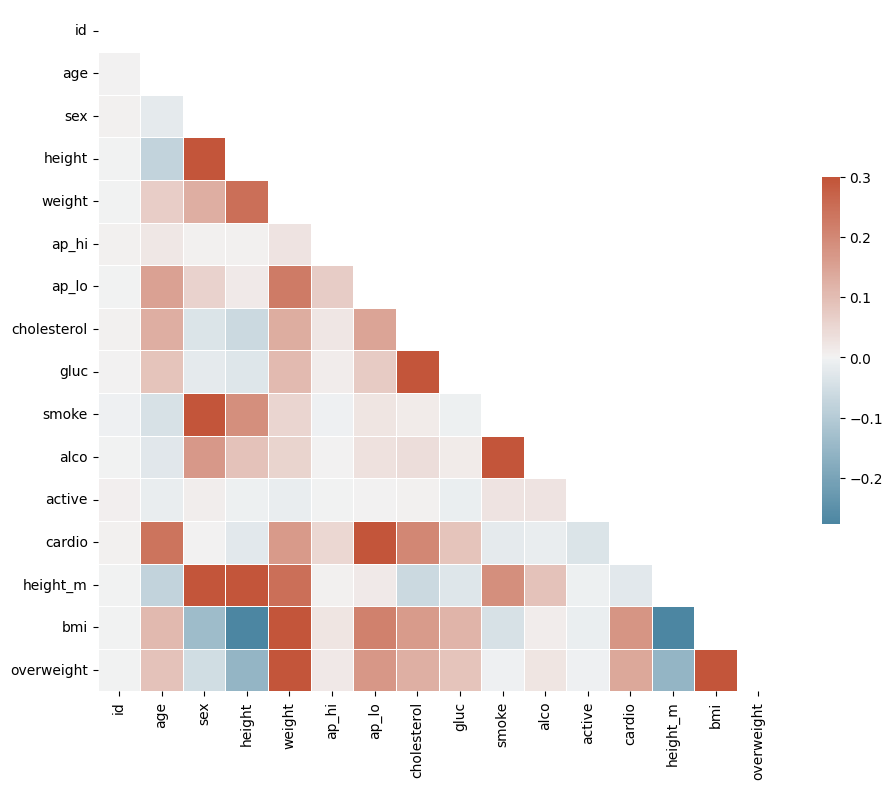

In [110]:

# Calculate the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))


# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with 'sns.heatmap()'
df_heat = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
                    square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [32]:
# Create a correlation matrix using the dataset. Plot the correlation
# matrix using seaborn's heatmap(). Mask the upper triangle. The chart 
# should look like examples/Figure_2.png.

In [33]:
# Any time a variable is set to None, make sure to set it to the correct code

In [ ]:
# Draw Categorical Plot
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just 
    # the values from 'cholesterol', 'gluc', 'smoke', 'alco', 
    # 'active', and 'overweight'.
    df_cat = None
    
    # Group and reformat the data to split it by 'cardio'. Show the counts 
    # of each feature. You will have to rename one of the columns for the 
    # catplot to work correctly.
    
    df_cat = None
    # Do not modify the next two lines
    
    fig.savefig('catplot.png')
    return fig

In [91]:
# Draw Heat Map
def draw_heat_map():
    global df
    # Clean the data
    # Clean the data. Filter out the following patient segments that represent 
    # incorrect data:
    # diastolic pressure is higher than systolic 
    # (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    df = df[df['ap_lo'] <= df['ap_hi']]
    # height is less than the 2.5th percentile 
    h_low = df['height'].quantile(0.025)
    # (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    # height is more than the 97.5th percentile
    h_high = df['height'].quantile(0.975)
    df = df[(df['height'] >= h_low) & (df['height'] <= h_high)]
    # weight is less than the 2.5th percentile
    w_low = df['weight'].quantile(0.025)
    # weight is more than the 97.5th percentile
    w_high = df['weight'].quantile(0.975)
    df = df[(df['weight'] >= w_low) & (df['weight'] <= w_high)]
    
 

    # Calculate the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))


    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(11, 9))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    
    # Draw the heatmap with 'sns.heatmap()'
    df_heat = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0
                          square=True, linewidths=.5 cbar_kws={"shink": .5})

    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig